# Problem Sheet 1
- To be completed by **4pm** on **Fri 9th Feb** and uploaded to [Problem Sheet 1 submission point](https://moodle.bath.ac.uk/mod/assign/view.php?id=1289208) on Moodle or handed in to your tutor in your lab.

## Linear regression of time series data

Recall the Oxford temperature data considered in the lecture. In this lab we will try to approximate the known values of the temperature in time, and to predict the unknown values in the future. As a by-product, we will refresh our _numpy_ skills.

Once again, here is the prediction rule we would like to explore:

$$
h_{\boldsymbol\theta} (x) = \theta_0 + \theta_1 x + \cdots + \theta_n x^n,
$$

where $x$ is the time value, and $\boldsymbol\theta = (\theta_0,\ldots,\theta_n)$ is the vector of coefficients we will optimise. Given a dataset $D = (\mathbf{X},\mathbf{y})$ of months $\mathbf{X}=\{x_1,\ldots,x_m\}$ and temperature values $\mathbf{y}=\{y_1,\ldots,y_m\}$, we need to minimise the sum-of-squares loss

$$
L_{D}(\boldsymbol\theta) = \frac{1}{m}\sum_{i=1}^{m} (h_{\boldsymbol\theta} (x_i) - y_i)^2 \rightarrow \min_{\boldsymbol\theta \in \mathbb{R}^{n+1}}.
$$

## Warm-up
- Prove that a vector of $m$ predictions $\mathbf{\hat y}:=(h_{\boldsymbol\theta}(x_1),\ldots,h_{\boldsymbol\theta}(x_m))^\top$ can be computed as a product of the _Vandermonde_ matrix 
$$
V = \begin{bmatrix} 1 & x_1 & \cdots & x_1^n \\
     1 & x_2 & \cdots & x_2^n\\
     \vdots &  & & \vdots \\
     1 & x_m & \cdots & x_m^n
     \end{bmatrix} \in \mathbb{R}^{m \times (n+1)}
$$
and the parameter vector $\boldsymbol\theta$, $\mathbf{\hat y} = V\boldsymbol\theta.$

#### Solution:
Let $\mathbf{v}_i = (1, x_i , \cdots , x_i^n)$, the $i$-th row of $V$. Note that $(V\boldsymbol\theta)_i = \mathbf{v}_i \boldsymbol\theta = \theta_0 + x_i \theta_1 + \cdots + x_i^n \theta_n = h_{\boldsymbol\theta}(x_i) = \hat y_i$, for any $i=1,\ldots,m$.


## Task (a): sum-of-squares minimiser

- **Prove** that any solution of Equation (1.2) in the lecture notes satisfies the first-order optimality conditions (Equation (1.1))
$$
\frac{\partial L_D(\boldsymbol\theta^*)}{\partial \theta_0} = \cdots = \frac{\partial L_D(\boldsymbol\theta^*)}{\partial \theta_n} = 0
$$
in general.
Recall that
Equation (1.2) is a system of linear equations
$$
A \boldsymbol\theta^* = \mathbf{b},
$$
where
$$
A = V^\top V, \qquad \mathbf{b} = V^\top \mathbf{y}.
$$


_Hint: use Warm-up and some further elementary calculus which you can write on a paper and hand it in to your tutor, or upload its scan on Moodle. Note that you don't need to derive the solution_ $\boldsymbol\theta^*$ _explicitly._

#### Solution
The elementwise gradient calculation in the lecture can be collected into a matrix notation,
$$
\frac{\partial L_{\mathbf{D}}(\boldsymbol\theta^*)}{\partial \theta_j} = \frac{2}{m} \sum_{i=1}^{m} \underbrace{x_i^j}_{V_{i,j}} ((V\boldsymbol\theta^*)_i - y_i) = \frac{2}{m} V^\top_j (V \boldsymbol\theta^* - \mathbf{y}) = \frac{2}{m}(V^\top V \boldsymbol\theta^* - V^\top \mathbf{y})_j = 0, \quad j=0,\ldots,n.
$$

---

## Task 0: fetching this problem sheet on the Noteable Jupyter server

- **Click** [Noteable Jupyter server Link 1](https://moodle.bath.ac.uk/mod/lti/view.php?id=1244982) on Moodle, and start or reconnect to a "Standard Notebook (Python 3)" server. When it's up and running, **click** [Noteable Jupyter server Link 2](https://moodle.bath.ac.uk/mod/url/view.php?id=1245035). This will create a folder `MA20278_24` where all Python-related materials will be provided.

```
Don't forget to click Link 2 regularly (at least once a week) during the semester to fetch the latest materials.
```


- Change to the sub-folder `week1` in the folder `MA20278_24`

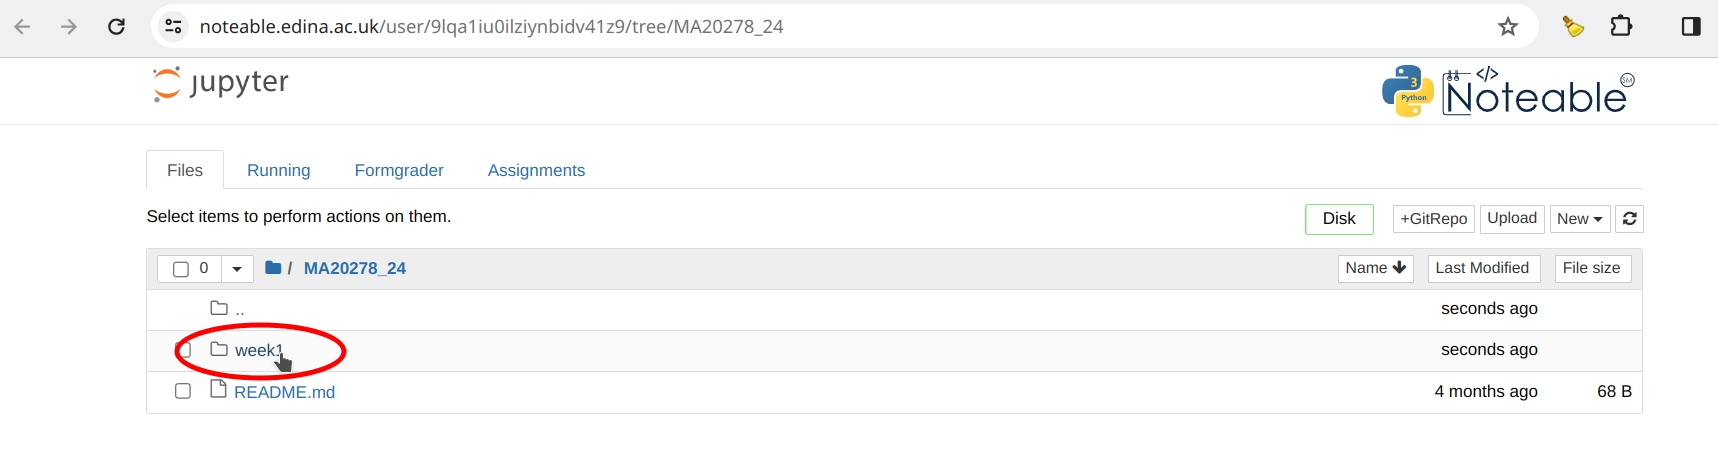

Here you will find a Jupyter notebook file `ProblemSheet1.ipynb`, which is a copy of this problem sheet, and a data file `OxfordTemp.txt`, containing monthly average temperatures in Oxford starting from January 2022.

- It's safe to edit `ProblemSheet1.ipynb` here, since further clicks on Link 2 will **not** overwrite it once you make (and save!) any changes.


## Task 1: read and split the data

- The file `OxfordTemp.txt` contains the dataset $\mathbf{D} = \{(x_1,y_1),\ldots,(x_m,y_m)\}$ in the form of two columns separated by a tab. **Read about** the _numpy_ **function** `np.loadtxt` (https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html) which can be used to load simple text data as a _numpy_ array. 
- **Write a Python code** that loads the file `OxfordTemp.txt` into a _numpy_ array, and extracts the first column as a _numpy_ array $\mathbf{x}\in\mathbb{R}^m$, and the second column as an array $\mathbf{y}\in\mathbb{R}^m$. You can use the cell below. 

In [1]:
import numpy as np
D = np.loadtxt('OxfordTemp.txt')
x = D[:,0]
y = D[:,1]

## Warm-up: polynomial features

- **Write** a Python **function** ``features(x,n)`` that takes as input a _numpy_ array $\mathbf{x}\in\mathbb{R}^m$ and an integer number $n \ge 0$, and constructs and returns the Vandermonde matrix $V\in \mathbb{R}^{m \times (n+1)}$ as a _numpy_ array.

In [2]:
def features(x,n):
    powers = np.arange(n+1)               # [0,1,2,...,n]
    powers = np.reshape(powers, (1, -1))  # Make it explicitly a row vector
    x = np.reshape(x, (-1, 1))            # Make it explicitly a column vector
    return x**powers                      # Python automatically broadcasts the vectors to each others' shapes 
                                          # and takes the power between the resulting matrices elementwise

## Task 2: optimisation of the parameters
- **Write** a Python **function** `optimise_loss(V,y)` that takes as **input** the matrix $V$ constructed in the previous task and the vector $\mathbf{y}$ loaded from the file. This function should compute the matrix $A = V^\top V$, the vector $\mathbf{b} = V^\top \mathbf{y}$, solve the linear equations $A \boldsymbol\theta^* = \mathbf{b}$, and **return** the vector $\boldsymbol\theta^*$.

_Hint: you can recap on numpy functions `@` (matrix multiplication) and `np.linalg.solve`_

In [3]:
def optimise_loss(V,y):
    return np.linalg.solve(V.T @ V, V.T @ y)

## Task 3: results
- **Write** a Python **code** to compute the optimised parameter $\boldsymbol\theta^*$ using the functions from the previous tasks and the training arrays $\mathbf{x},\mathbf{y}$.
- **Compute** the prediction $h_{\boldsymbol\theta^*}(\hat x)$ for $\hat x$ ranging from $1$ to $17$ (inclusive). 

_Hint: `np.arange` can produce an appropriate array_ $\mathbf{\hat x}$

- **Plot** both the training data $\mathbf{y}$ as a function of $\mathbf{x}$, and the prediction $\mathbf{\hat y} = h_{\boldsymbol\theta^*}(\mathbf{\hat x})$ as a function of $\mathbf{\hat x}$ on the same graph.

_Hint: recap on `matplotlib.pyplot.plot`_

- **Vary** $n$ from 1 to 10 and rerun this experiment. Which $n$ gives the most accurate prediction of the known values of the temperature? Which $n$ gives the most "reasonable" prediction for the unknown value at $x=17$?

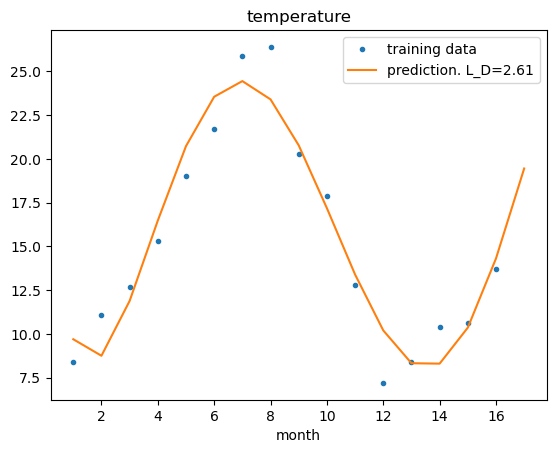

In [4]:
from matplotlib import pyplot as plt

n = 5

# Compute the optimal parameter
V = features(x, n)
theta = optimise_loss(V, y)

x_pred = np.arange(1, 18) # Prediction set of months
# Predicted temperature values are the values of the same polynomial but at x_pred time points
V_pred = features(x_pred, n)
y_pred = V_pred @ theta

# Plot two lines on the same axis
plt.plot(x, y, '.', x_pred, y_pred)
plt.xlabel('month')
plt.title('temperature')
plt.legend(("training data", f"prediction. L_D={np.mean((y_pred[:-1] - y)**2):.2f}"))
plt.show()

Note that the smallest $L_D \approx 0.59$ is achieved with the largest $n=10$, but in this case the prediction for the new 17th month looks highly erratic. The most reasonable prediction can be seen with the intermediate value $n=5$.